<a href="https://colab.research.google.com/github/dasmiq/idi-cites/blob/main/idi_cites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citations of Perseus Greek and Latin texts in IDI books

This notebook merges the passim output with Perseus and Harvard metadata and gives some example plots.

We start by loading some tidyverse libraries.

In [2]:
suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
  library(stringr)
})

First, we load information on titles and groups (i.e., usually authors) of CTS works.

In [3]:
works <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/works.csv", header=TRUE)

We load word counts of the editions (i.e., not translations) of CTS works.

In [4]:
work.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/work-words.csv", header=TRUE)

We load data that computes the longest common subsequence between a CTS works citable chunks and the passim alignment, weighted by the length of the aligned chunks. This serves as a proxy for whether an IDI contains an edition of (part of) a CTS work.

In [5]:
overlap <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/overlap.csv", header=TRUE) |>
    mutate(wlcs=if_else(wlcs < lblcs, lblcs, wlcs)) |> mutate(wover=wlcs/tlen)

In [6]:
lab.over <- overlap |> mutate(urn=str_replace(edition, "\\.[^.]+$", "")) |> left_join(works, by="urn") |> select(-c("group"))

Considering books that cover at least 10% of a work's chunks in order, we can count the works with the most editions.

In [49]:
lab.over |> filter(wover >= 0.1) |> group_by(urn, author, title) |> count() |> ungroup() |>
  mutate(language=if_else(str_detect(urn, "greekLit"), "Greek", "Latin")) |>
  filter(language == "Greek") |>
  select(urn, author, title, n) |>
  arrange(-n) |> head(40)

urn,author,title,n
<chr>,<chr>,<chr>,<int>
urn:cts:greekLit:tlg0031.tlg010,New Testament,Letter to the Ephesians,322
urn:cts:greekLit:tlg0031.tlg001,New Testament,Gospel according to Matthew,300
urn:cts:greekLit:tlg0031.tlg017,New Testament,Letter to Titus,292
urn:cts:greekLit:tlg0031.tlg012,New Testament,Epistle to the Colossians,283
urn:cts:greekLit:tlg0031.tlg004,New Testament,Gospel of John,280
urn:cts:greekLit:tlg0031.tlg015,New Testament,First Epistle to Timothy,277
urn:cts:greekLit:tlg0031.tlg003,New Testament,Gospel according to Luke,274
urn:cts:greekLit:tlg0031.tlg009,New Testament,Galatians,269
urn:cts:greekLit:tlg0031.tlg011,New Testament,Letter to the Philippians,266


We then download data on _all_ alignments, not just full editions, between CTS texts and IDI books. Since it's large, we first download the file and then load into R.

In [8]:
#cites <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")))),
#  header=TRUE)

system("wget https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")

In [9]:
cites <- read.csv("cites.csv.gz", header=TRUE)

We now grab selected fields of book-level metadata on IDI books.

In [10]:
idi <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/idi-meta.csv.gz")))),
  header=TRUE)

In [11]:
count(idi)

n
<int>
983004


We join the full citation data with the data on editions. Any book that has contiguous coverage of at least 10% of a works citations is considered an edition.

In [12]:
ed.cites <- overlap |> filter(wover >= 0.1) |> mutate(work=str_replace(edition, "\\.[^.]+$", "")) |> group_by(work, book) |> summarize(eds=n(), .groups="drop") |>
  right_join(cites, by=c("work", "book"))

Check IDI books with weird dates.

In [13]:
idi |> filter(!str_detect(date1_src, "[0-9u][0-9u][0-9u][0-9u]") & date1_src != "")

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
32044014499081,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,90,91
32044058285594,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,92,98
32044018934927,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,91,98
32044108123936,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,63,88
32044108123944,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,62,90
32044108123969,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,61,84
32044108123985,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,73,91
32044108123993,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,70,91
32044108124009,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,67,88


Note that at least two-thirds of the IDI books have at least one Greek or Latin quotation.

In [14]:
ed.cites |> filter(hits >= 1) |> select(book) |> distinct() |> count()

n
<int>
597441


Convert IDI's two string date fields into years and pick the lower one.

In [15]:
idi.dated <- idi |>
  mutate(year=suppressWarnings(as.integer(date1_src)), year2=suppressWarnings(as.integer(date2_src))) |>
  mutate(year=if_else(year2 < year & !is.na(year2) & year2 > 1400, year2, year))

Join all the citation data and metadata together into one dataframe.

In [16]:
meta.cites <- ed.cites |>
  mutate(is.edition=(!is.na(eds) & eds >= 1)) |> select(-eds) |>
  inner_join(works |> mutate(work=urn, work.label=paste(author, title, sep=", ")) |>
                      select(work, work.author=author, work.title=title, work.label), by="work") |>
  inner_join(work.words, by="work") |>
  inner_join(select(idi.dated, book, author, title, year, language=language_gen), by="book")


We're finally ready for the first example plot! Grab editions of Thucydides and plot a histogram of the books' publication dates. The IDI corpus doesn't link multivolume works, e.g., in 1759.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


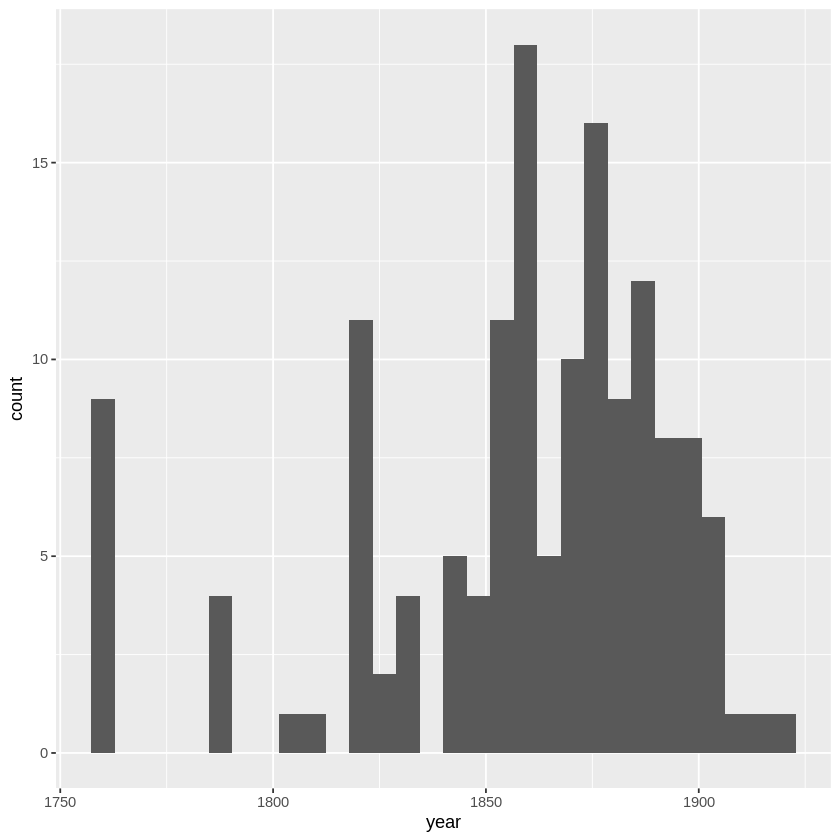

In [17]:
thuc.eds <- meta.cites |> filter(is.edition & work == "urn:cts:greekLit:tlg0003.tlg001")

ggplot(thuc.eds, aes(year)) + geom_histogram()

List the full data for those Thucydides editions.

In [18]:
thuc.eds |> mutate(book=tolower(book)) |> arrange(year)

work,book,hits,is.edition,work.author,work.title,work.label,words,author,title,year,language
<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
urn:cts:greekLit:tlg0003.tlg001,hn5xhj,540,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhm,555,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhp,767,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhq,612,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6h,613,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6i,619,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6j,716,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6l,535,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6n,556,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell


Plot histograms for editions of Thucydides, Herodotus, and Homer.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


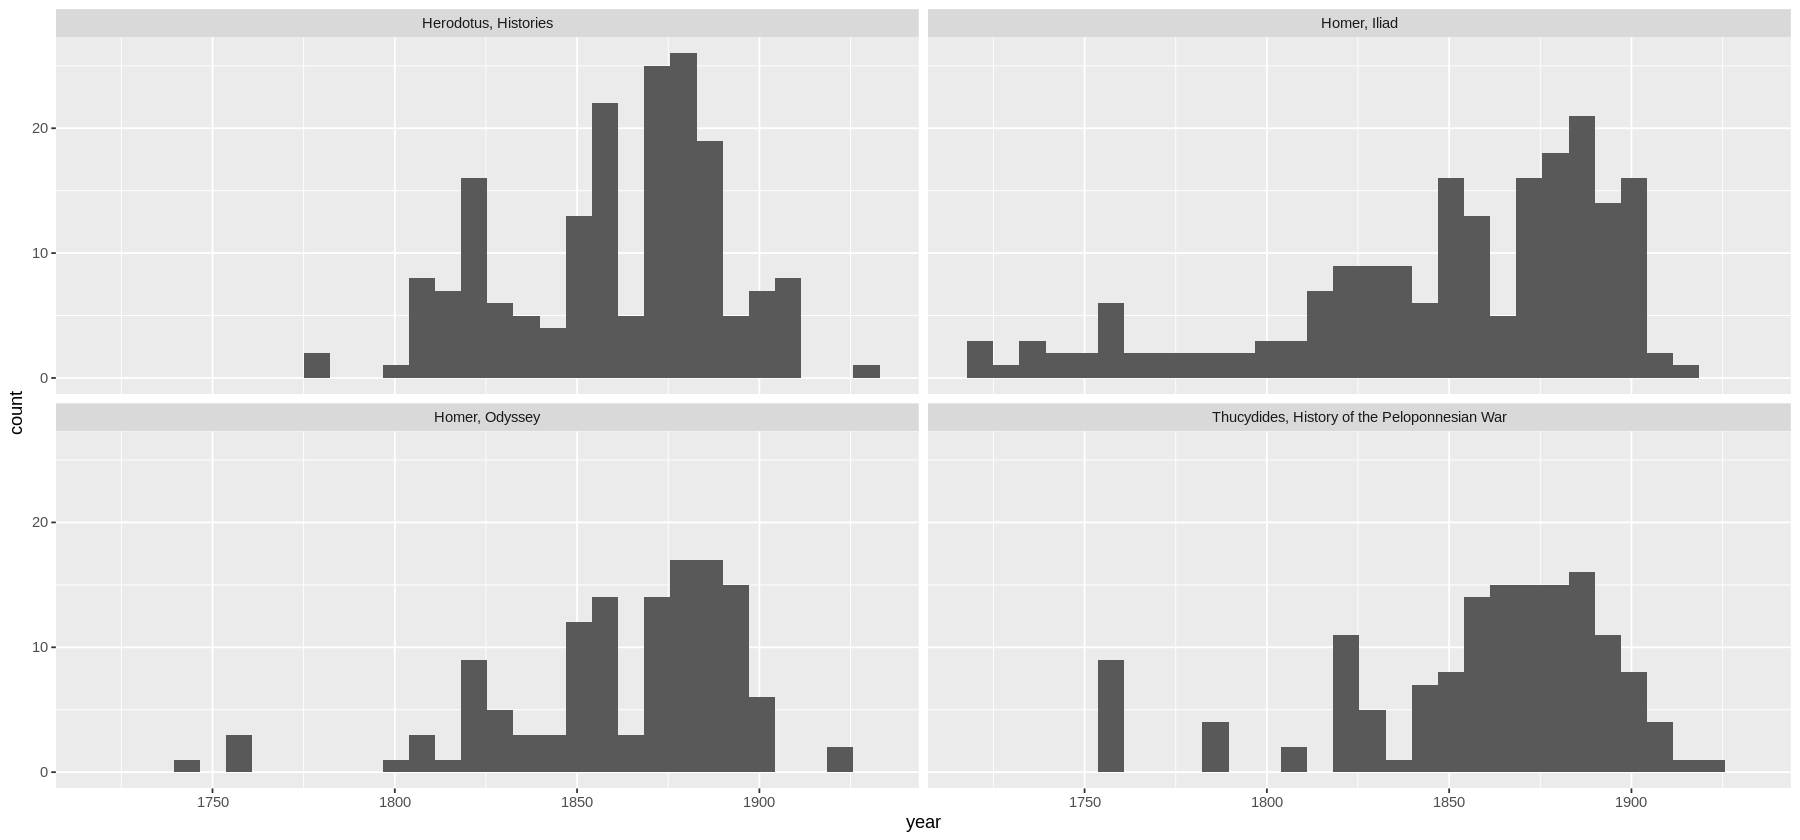

In [19]:
options(repr.plot.width=15)
meta.cites |> filter(is.edition & str_detect(work, "tlg(0003|0016|0012)\\.tlg00[12]")) |>
  ggplot(aes(year)) + geom_histogram() + facet_wrap(vars(work.label))

We now look at the citations of those four works _not_ in books that are editions of those works. They all seem to peak in the later 19c, except for Herodotus, which peaks around 1840.

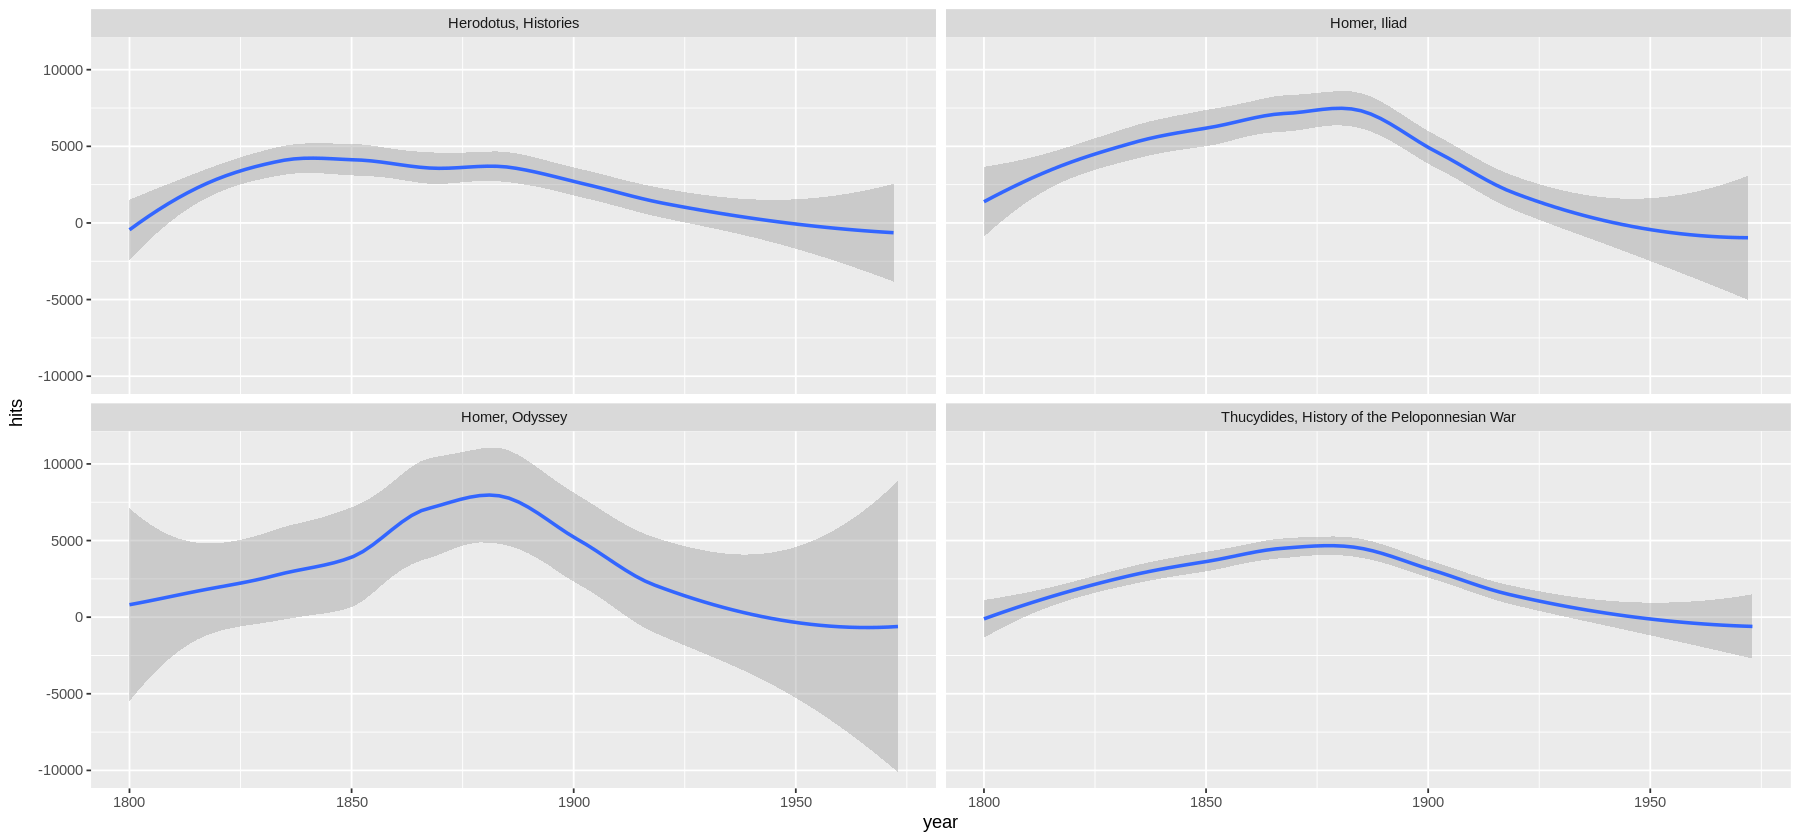

In [20]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(year, hits)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

But are we counting citations the right way? There are just a lot more books in the late 19c, before the copyright cliff. (This plot also shows some outliers that we could use to clean up the IDI metadata.)

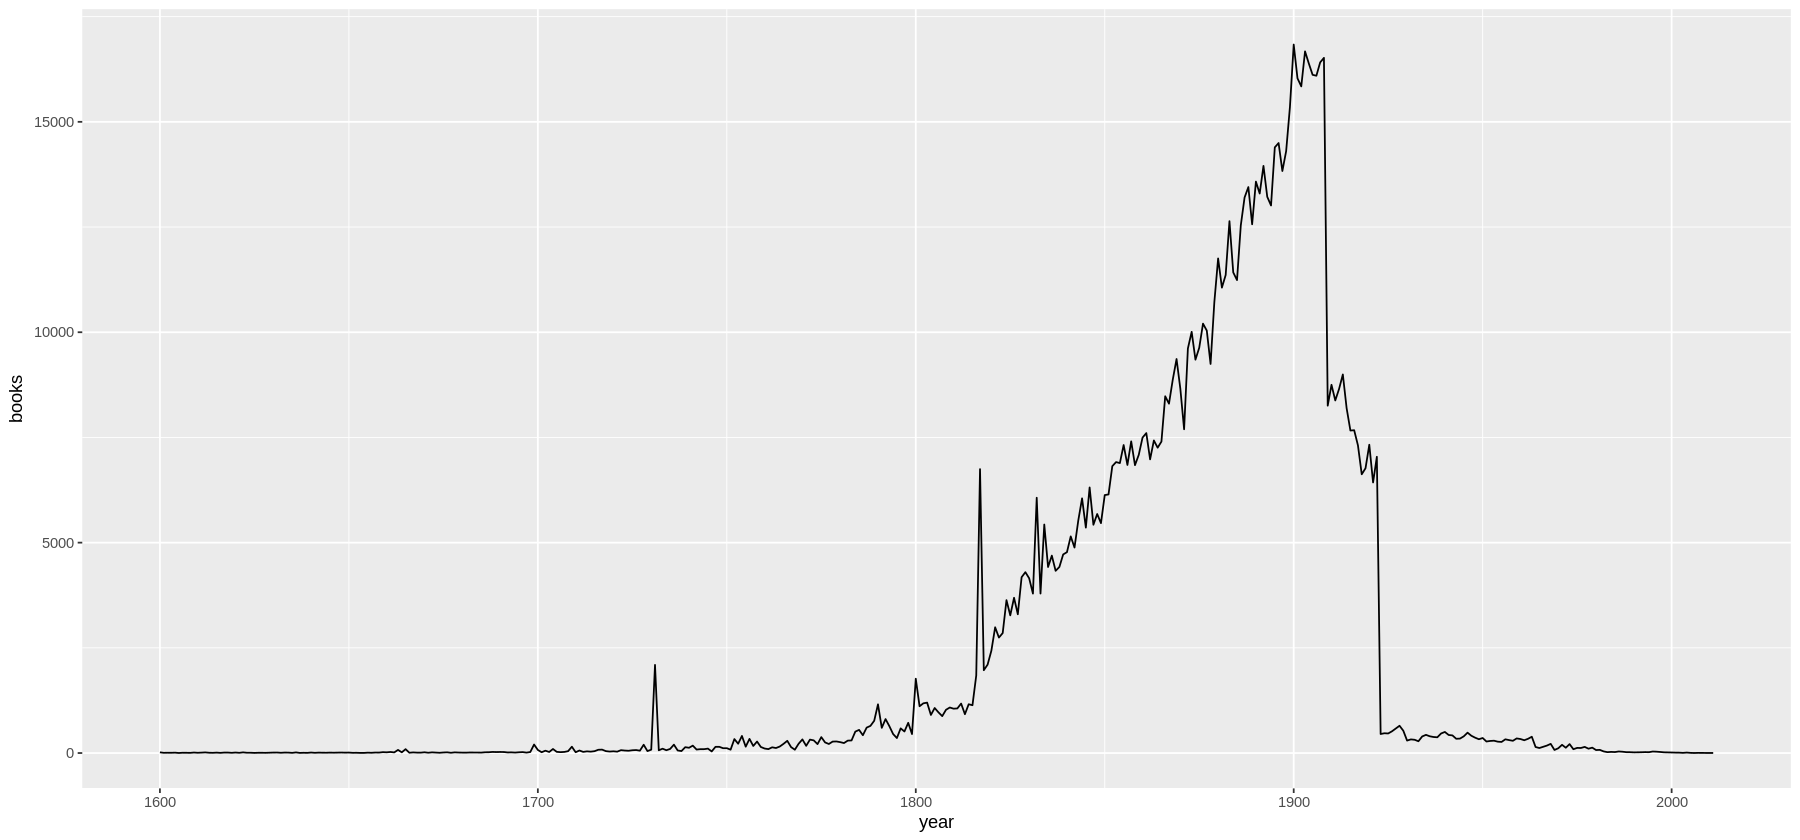

In [21]:
year.books <- idi.dated |> group_by(year) |> summarize(books=n())

year.books |> filter(year >= 1600) |>
  ggplot(aes(year, books)) + geom_line()

If we normalize number of citations by the number of books published in that year, we see that the rates of citation of these works are consistently _falling_ in the later 19c.

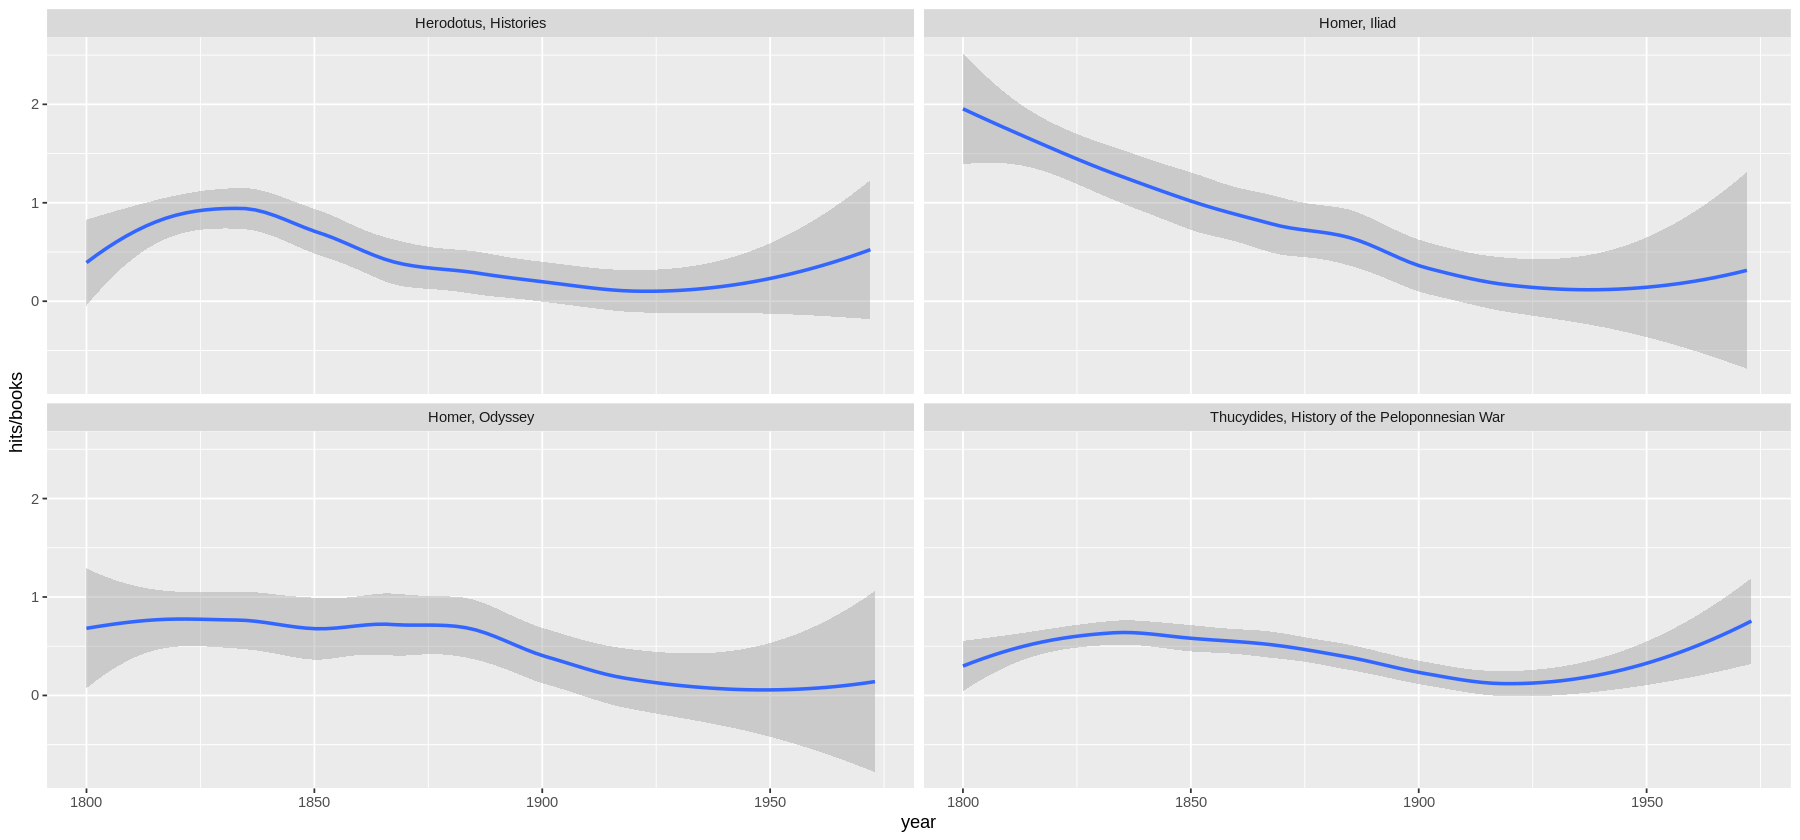

In [22]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

But is it really fair to judge the popularity of Homer by the number of _total_ books? Rather than using book-level metadata, or just the top-level LC classifications we get in IDI, what if we used the presence of Greek and Latin quotations as a proxy for "books that might have mentioned Homer"? We plot the books with quotations, including editions, on top of the total number of books.

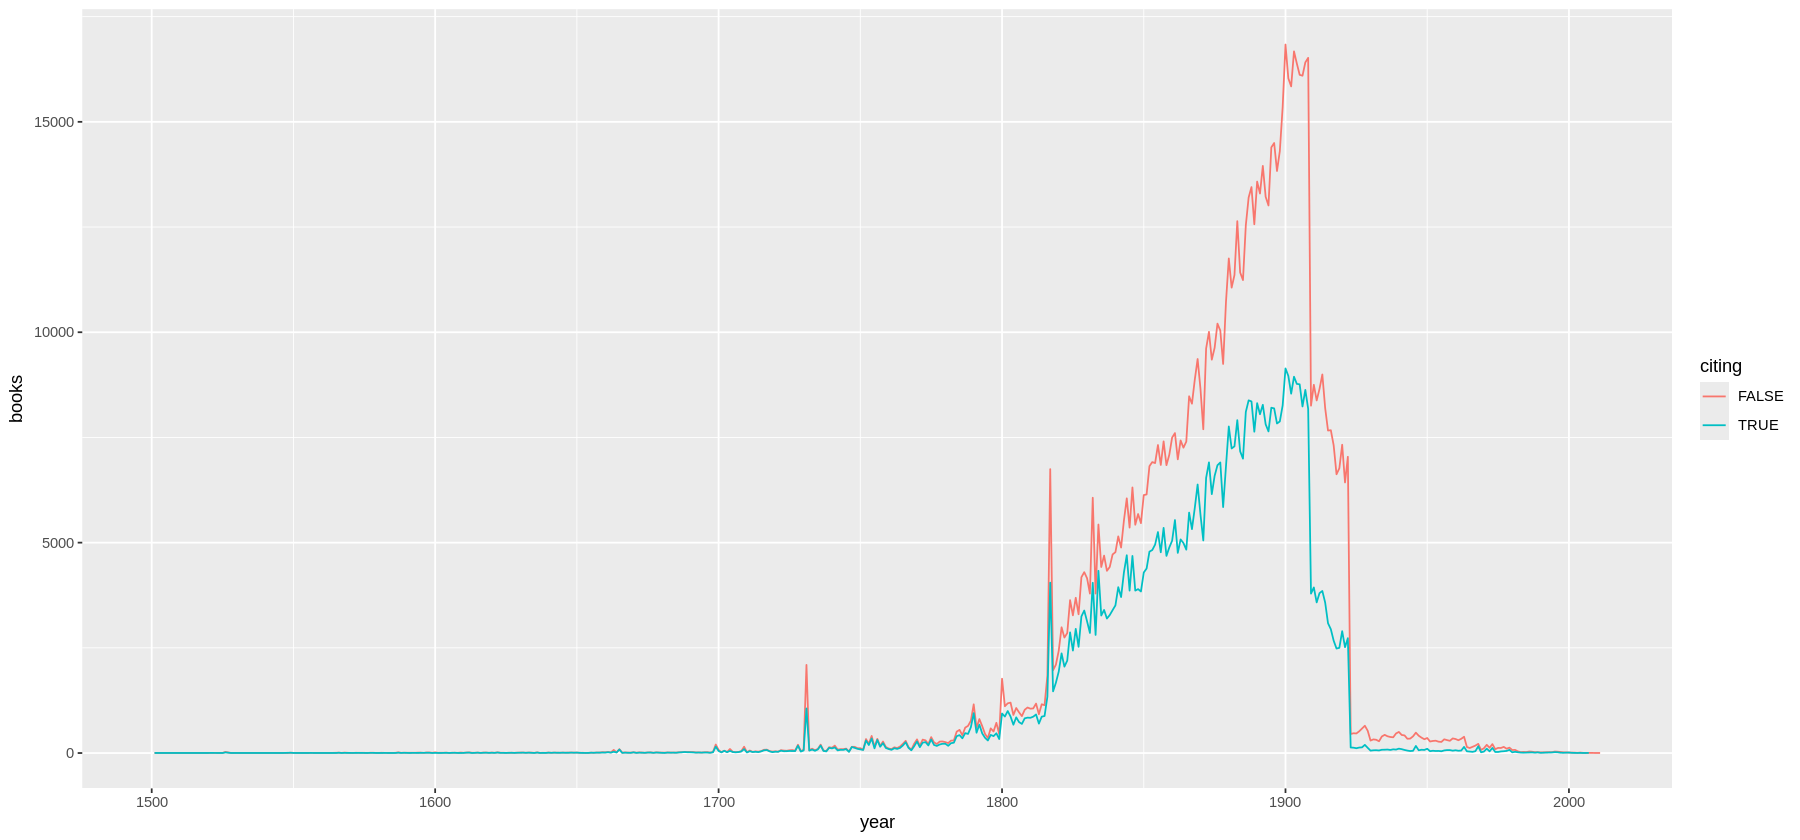

In [23]:
year.cite.books <- meta.cites |> select(year, book) |> distinct() |> group_by(year) |> summarize(books=n())

rbind(year.cite.books %>% mutate(citing=TRUE),
      year.books %>% mutate(citing=FALSE)) |> filter(year >= 1500) |>
  ggplot(aes(year, books, color=citing)) + geom_line()

When we normalize citations by the subset of books, we can see a more decided uptick in interest in Herodotus and Thucydides in the late 19c and early 20c.

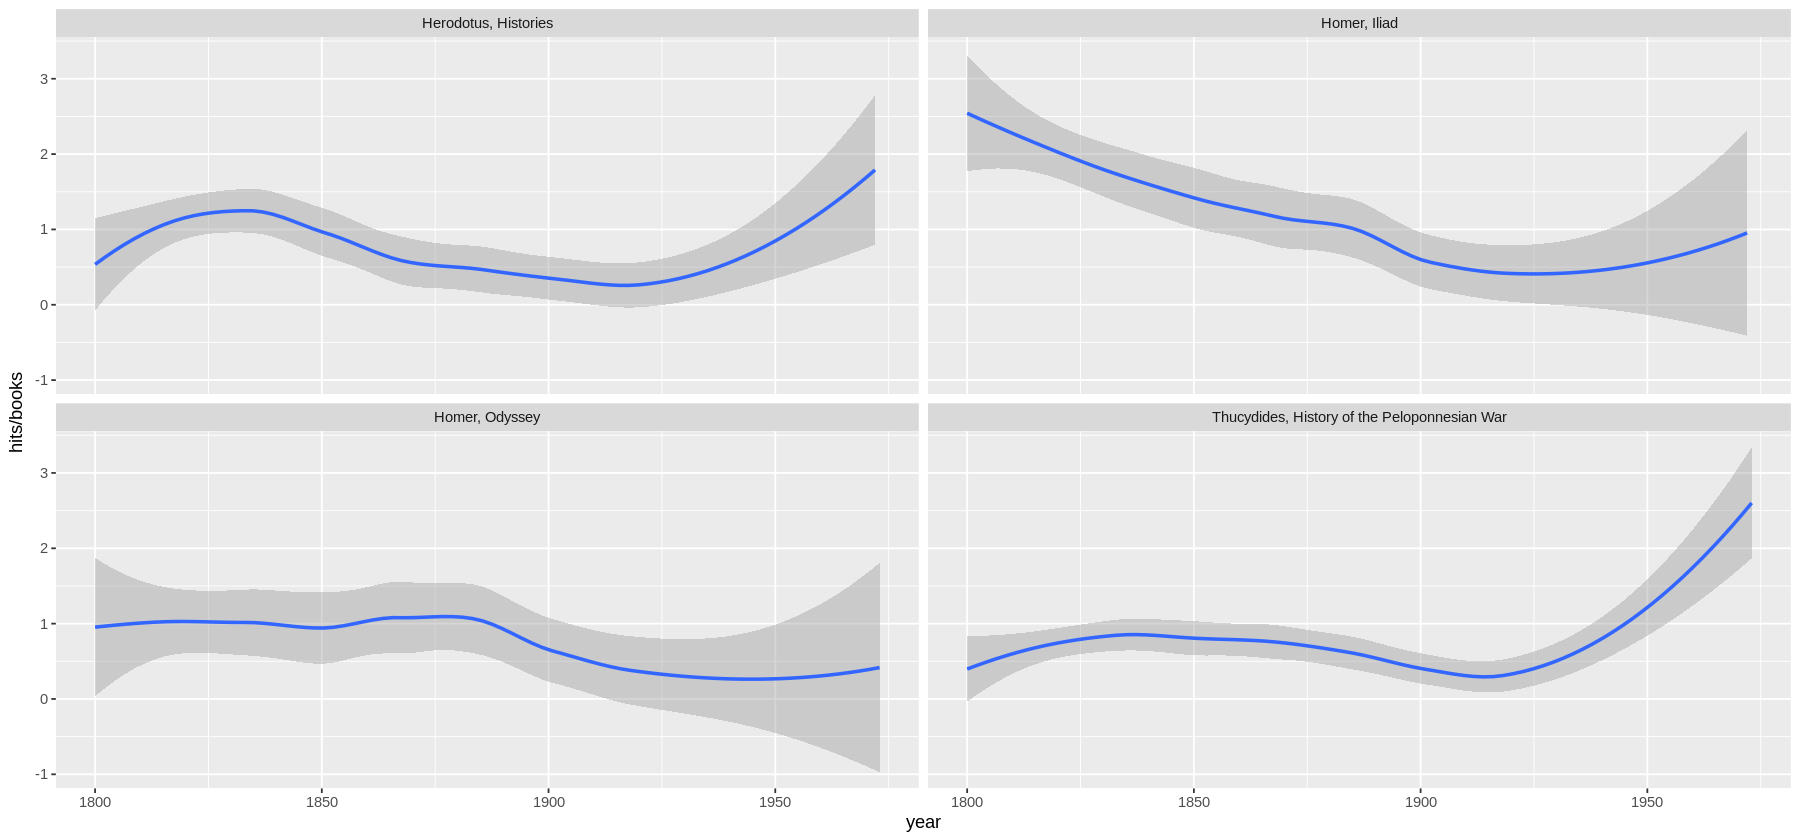

In [24]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

If we plot these by the IDI-detected language of these books, we can get a rough idea of the decline of scholarship in Latin.

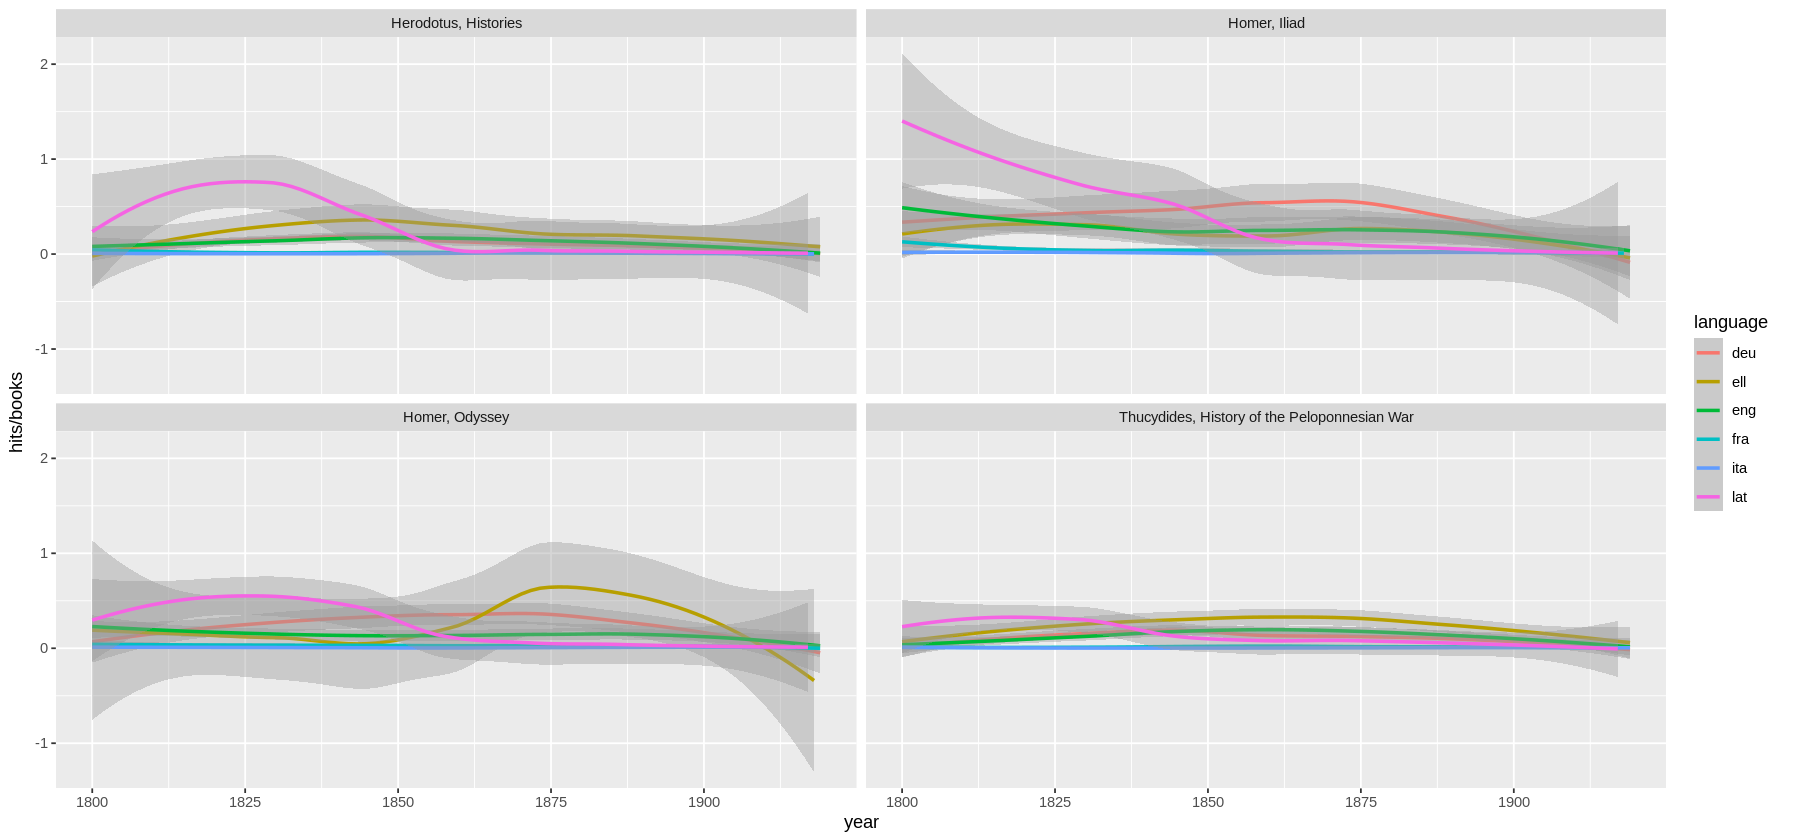

In [25]:
meta.cites |>
  filter(year >= 1800 & year < 1920) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  filter(language %in% alist(ell, lat, deu, eng, fra, ita)) |>
  group_by(year, work, work.label, language) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books, color=language)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

In [26]:
seq <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/seq.csv.gz")))),
  header=TRUE)

We'll plot the data from Thucydides, binned by 50-year periods.

In [27]:
thuc <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/locs/urn%3Acts%3AgreekLit%3Atlg0003.tlg001.csv.gz")))),
  header=TRUE)

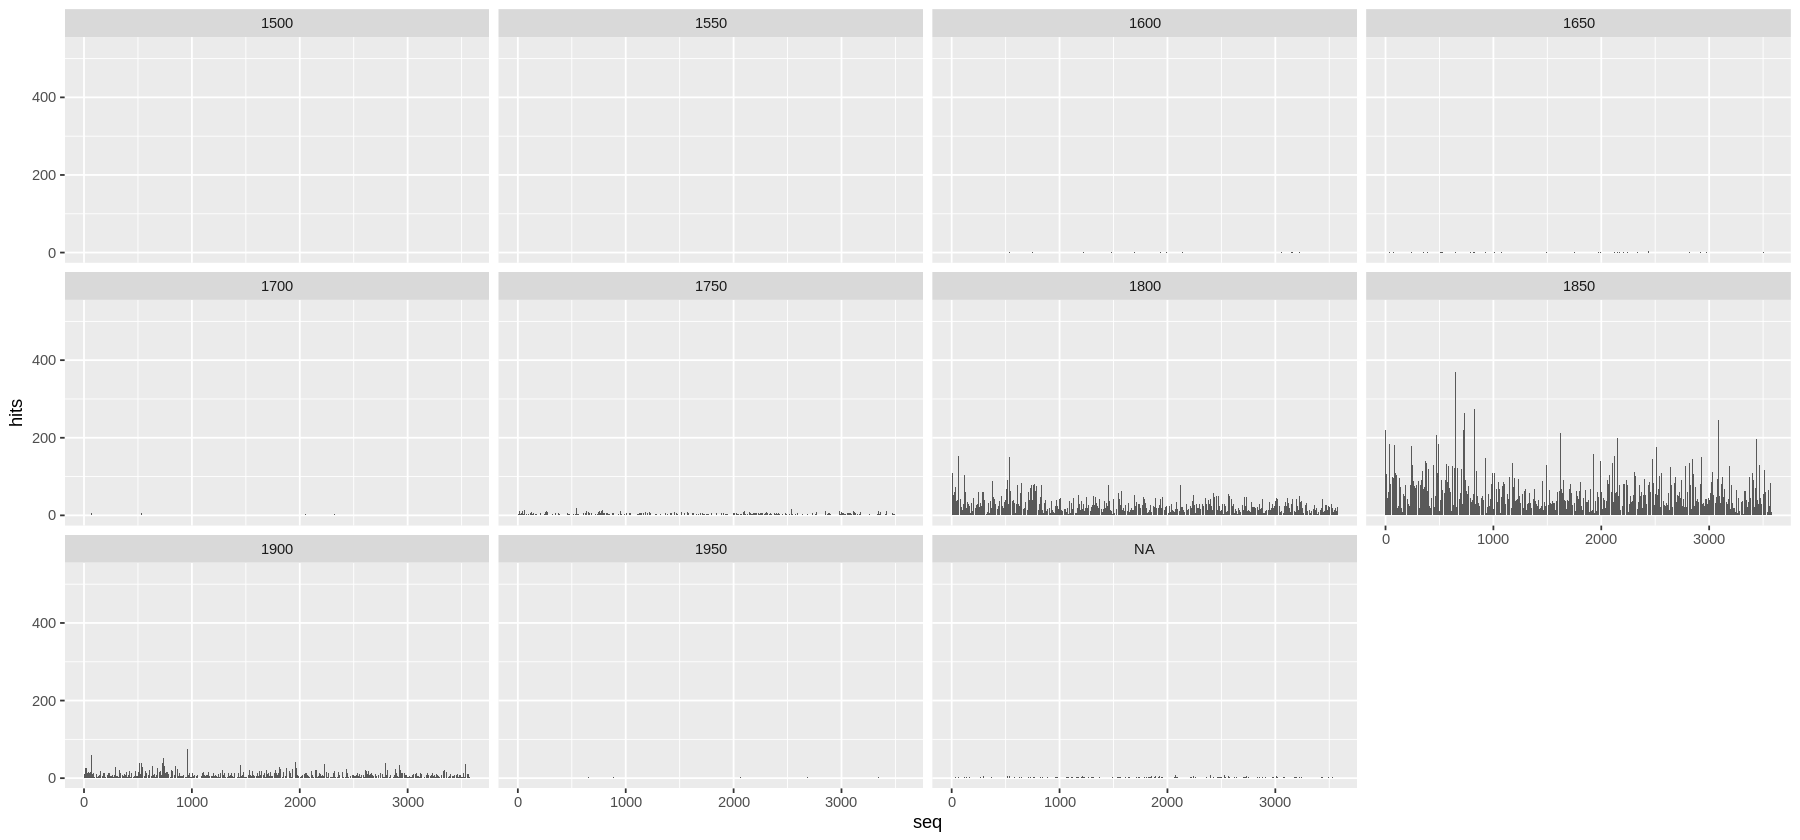

In [28]:
thuc |> inner_join(select(idi.dated, book, year, language=language_gen), by="book") |>
  anti_join(select(thuc.eds, book), by="book") |>
  mutate(bin=as.integer(year/50)*50) |>
  group_by(seq, bin) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(seq, hits)) + geom_col() + facet_wrap(vars(bin))

We join with the `seq` table to get the readable citations and see which ones are most quoted.

In [29]:
thuc |> inner_join(select(idi.dated, book, year, language=language_gen), by="book") |>
  anti_join(select(thuc.eds, book), by="book") |>
  inner_join(filter(seq, startsWith(loc, "urn:cts:greekLit:tlg0003.tlg001")), by="seq") |>
  group_by(loc) |> summarize(hits=sum(hits), .groups="drop") |> arrange(-hits)

loc,hits
<chr>,<int>
urn:cts:greekLit:tlg0003.tlg001:1.126.11,875
urn:cts:greekLit:tlg0003.tlg001:1.6.3,689
urn:cts:greekLit:tlg0003.tlg001:1.22.4,637
urn:cts:greekLit:tlg0003.tlg001:8.68.1,589
urn:cts:greekLit:tlg0003.tlg001:1.138.3,568
urn:cts:greekLit:tlg0003.tlg001:1.4.1,566
urn:cts:greekLit:tlg0003.tlg001:2.15.4,559
urn:cts:greekLit:tlg0003.tlg001:1.90.3,552
urn:cts:greekLit:tlg0003.tlg001:5.16.1,541


We now look at total classics publication.

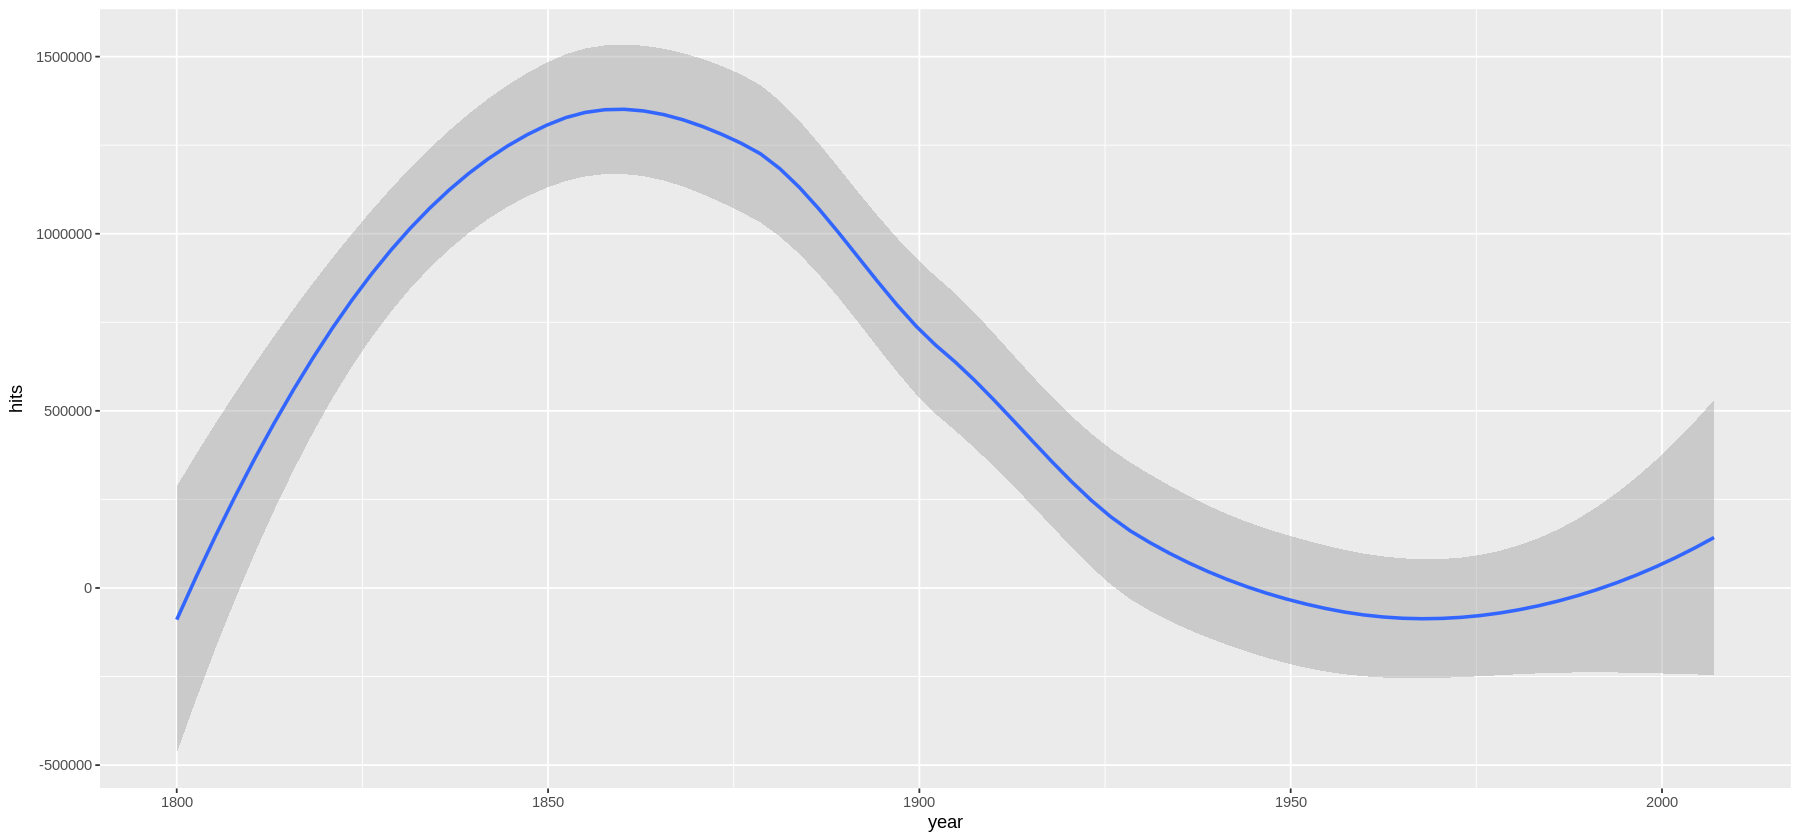

In [30]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(year, hits)) + geom_smooth(method="loess", formula=y ~ x)

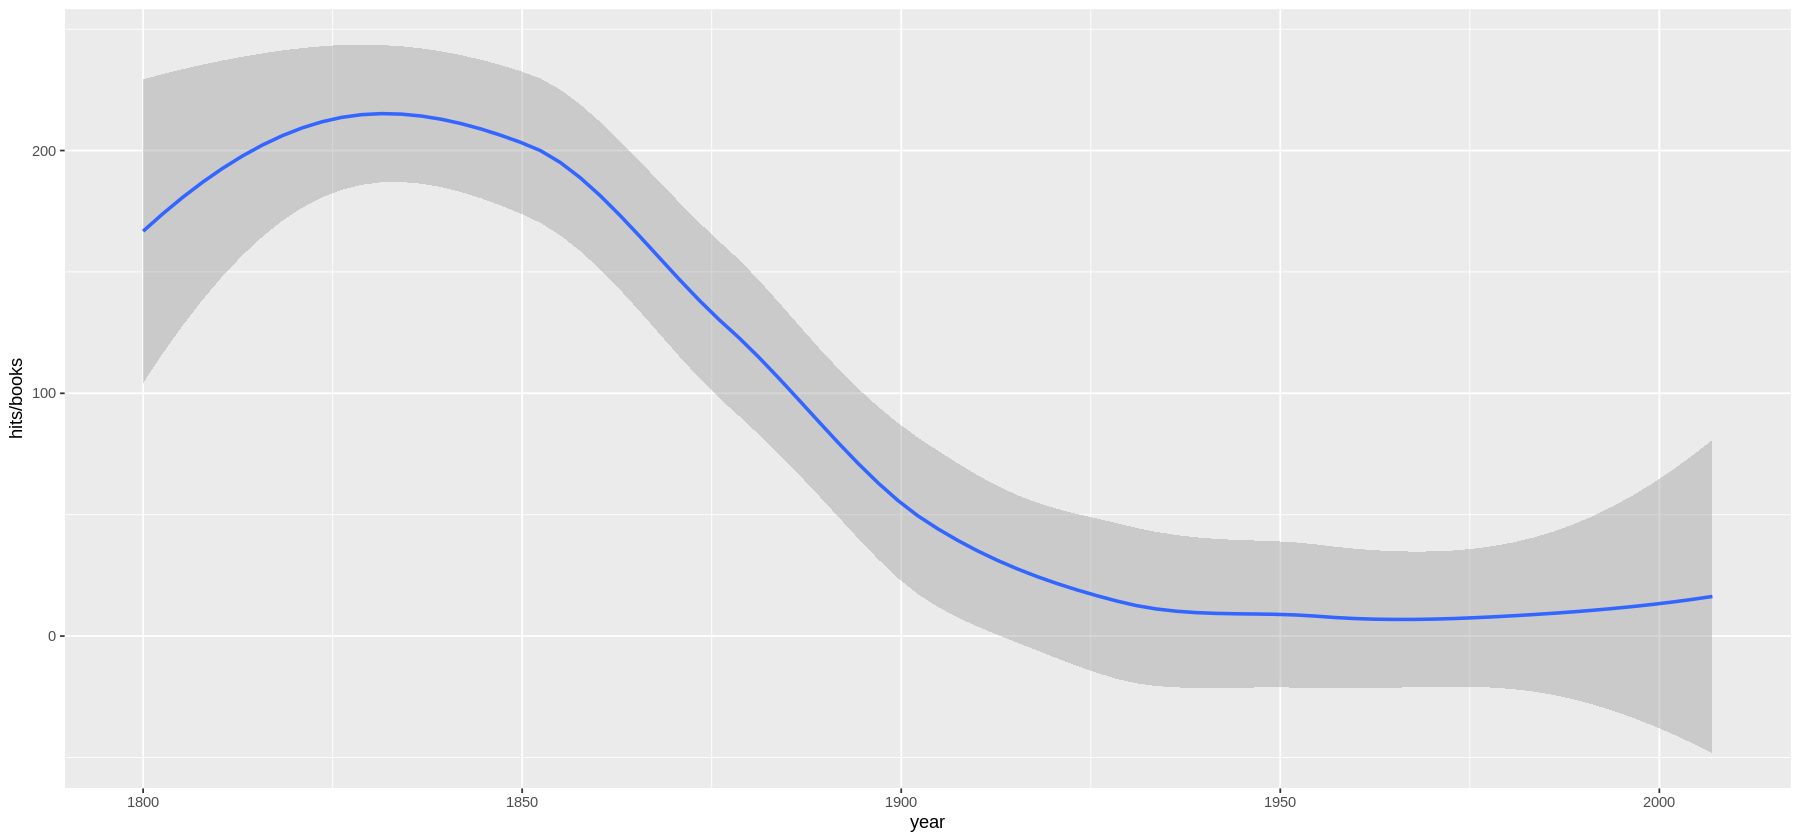

In [31]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x)

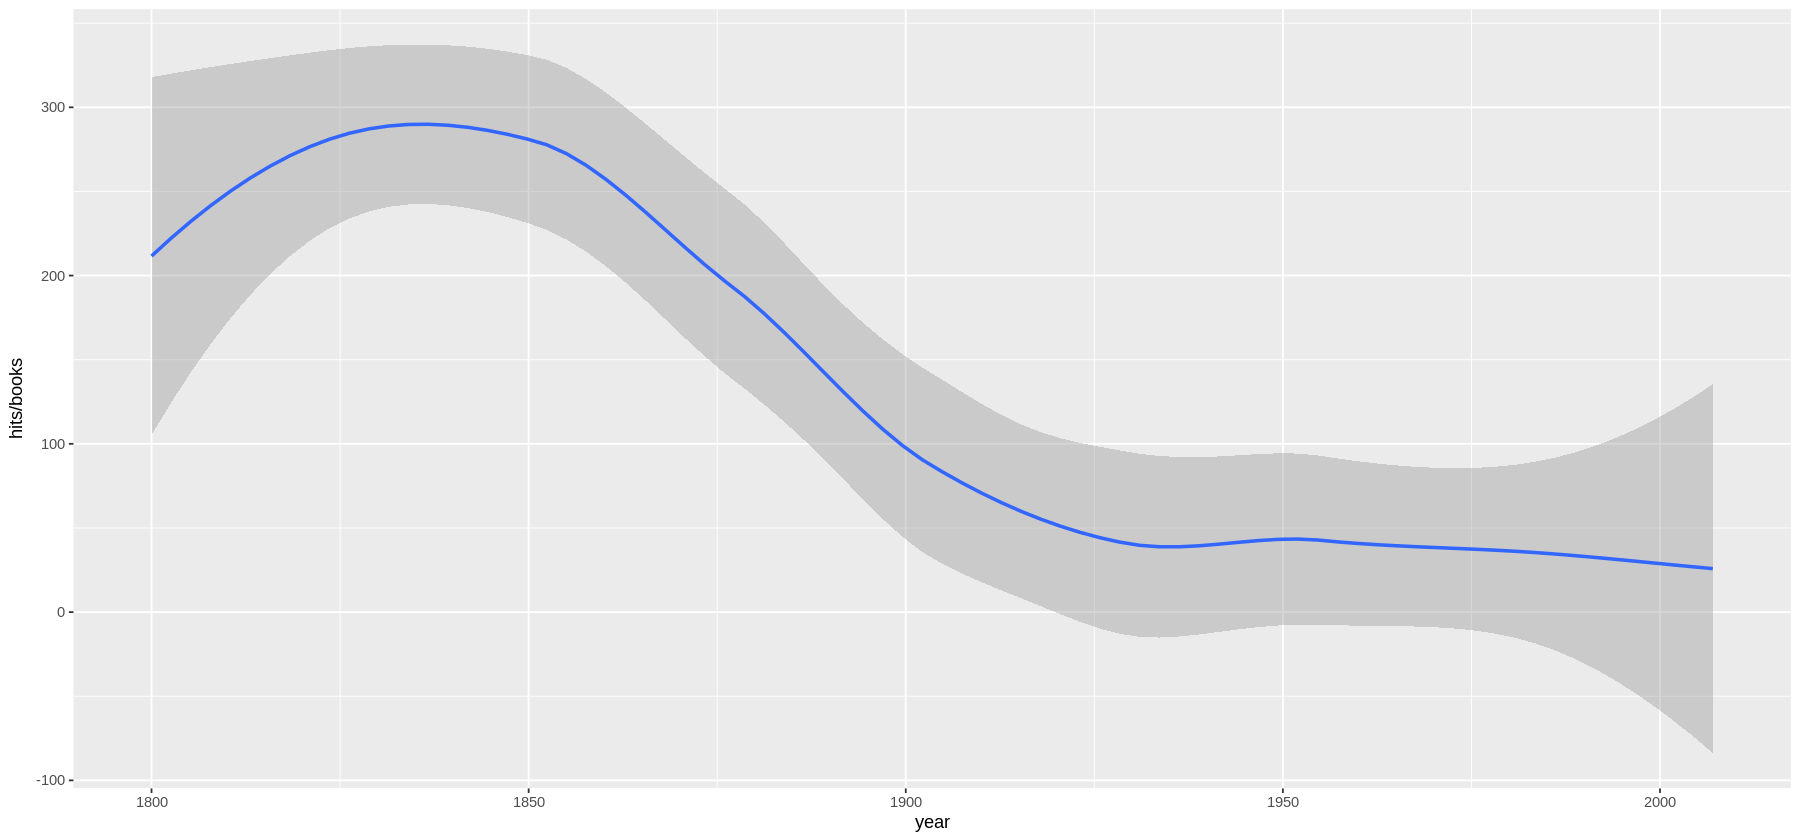

In [32]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x)

Editions as a proportion of books

In [33]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  arrange(-editions)

year,editions
<int>,<int>
1857,309
1844,253
1828,198
1829,180
1875,178
1881,173
1877,171
1821,169
1898,169


Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


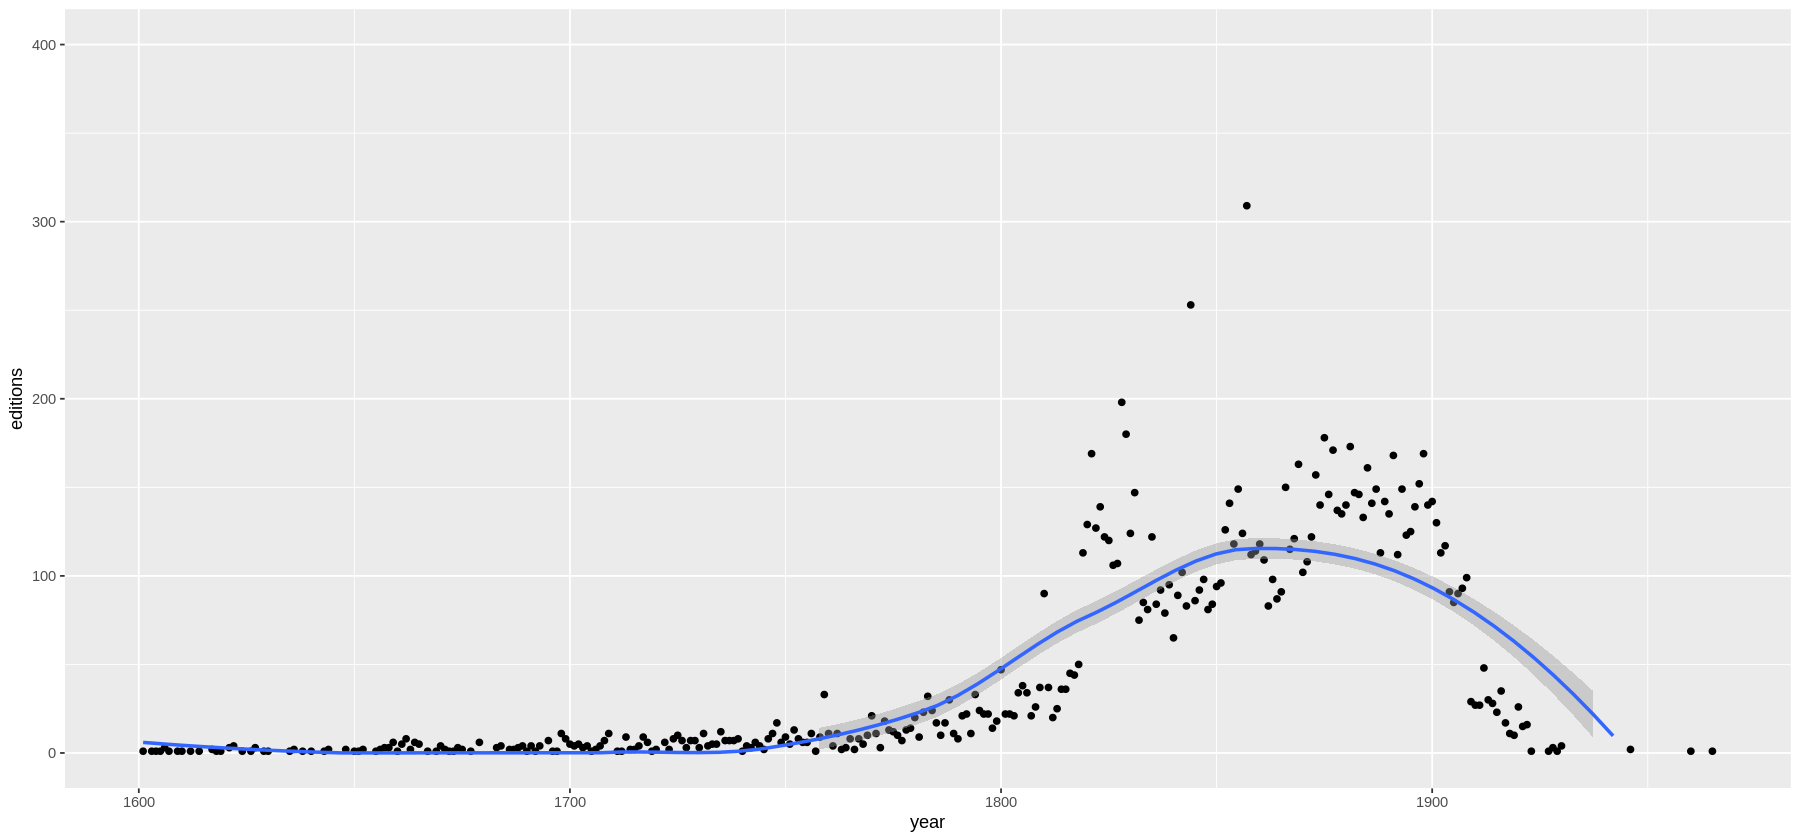

In [34]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, editions)) + geom_point() + geom_smooth(method="loess", formula=y ~ x) + scale_y_continuous(limits=c(0,400))

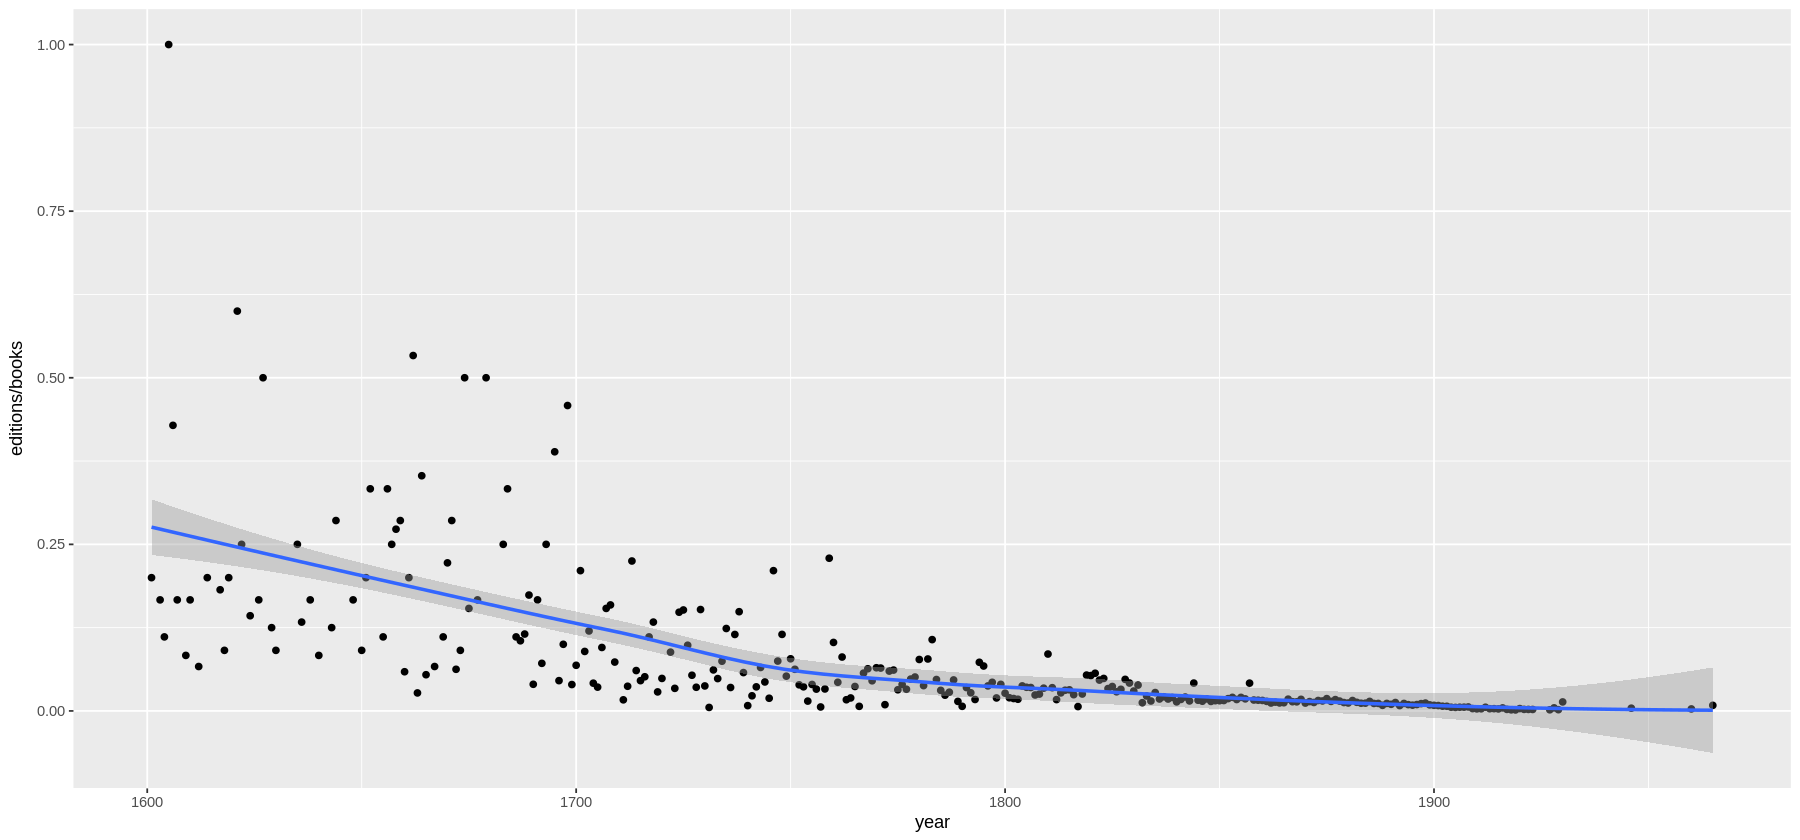

In [35]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, editions/books)) + geom_point() + geom_smooth(method="loess", formula=y ~ x)# + scale_y_continuous(limits=c(0,1))

Investigate outliers.

In [36]:
meta.cites |>
  filter(year >= 1700) |>
  filter(is.edition) |>
  select(year, book) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  mutate(prop=editions/books) |>
  arrange(-prop)

year,editions,books,prop
<int>,<int>,<int>,<dbl>
1759,33,144,0.22916667
1713,9,40,0.22500000
1701,4,19,0.21052632
1746,8,38,0.21052632
1708,7,44,0.15909091
1707,4,26,0.15384615
1729,7,46,0.15217391
1725,10,66,0.15151515
1738,7,47,0.14893617


In [37]:
idi.dated |> filter(year == 1713)

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen,year,year2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
32044105319867,Journal literaire.,,1713,uuuu,Continuing resource status unknown,fra,fra,92,78,1713,NA
32044105319875,Journal literaire.,,1713,uuuu,Continuing resource status unknown,fra,fra,91,72,1713,NA
AH631S,"The penitent pardon'd ; or, A discourse of the nature of sin, and the efficacy of repentance, under the parable of the prodigal son","Goodman, John",1713,,Single known date/probable date,eng,eng,93,98,1713,NA
HN79SM,Operum,Ovid,1713,,Single known date/probable date,lat,lat,92,87,1713,NA
HN79SN,Operum,Ovid,1713,,Single known date/probable date,lat,lat,93,87,1713,NA
HXGF81,"Statuts et privileges de la noblesse de la basse Alsace accordes par les anciens empereurs, confirmes et augmentes par le roy = E. frey ohnmittelbaren Ritterschafft im untern Elsass adeliche Ritter-Ordnung und theils kayserliche theils königliche ertheilte, confirmirte und erweiterte privilegia und rescripta.",Holy Roman Empire.,1713,,Single known date/probable date,fra,deu,89,61,1713,NA
32044020446340,"Unum necessarium, scire, quid sibi sit necessarium in vita et morte et post mortem, quod non-necessariis mundi fatigatus et ad unum necessarium sese recipiens,","Comenius, Johann Amos",1713,,Single known date/probable date,lat,lat,91,82,1713,NA
RSMD26,"L'école parfaite des officiers de bouche : qui enseigne les devoirs du maître d'hôtel & du sommelier, la maniere de faire les confitures séches & liquides, les liqueurs, les eaux les pommades & les parfums; la cuisine, à découper les viandes, & à faire la patisserie.",,1713,,Single known date/probable date,fra,fra,94,80,1713,NA
32044086920493,The wife of Bath. A comedy.,"Gay, John",1713,,Single known date/probable date,eng,eng,47,97,1713,NA


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


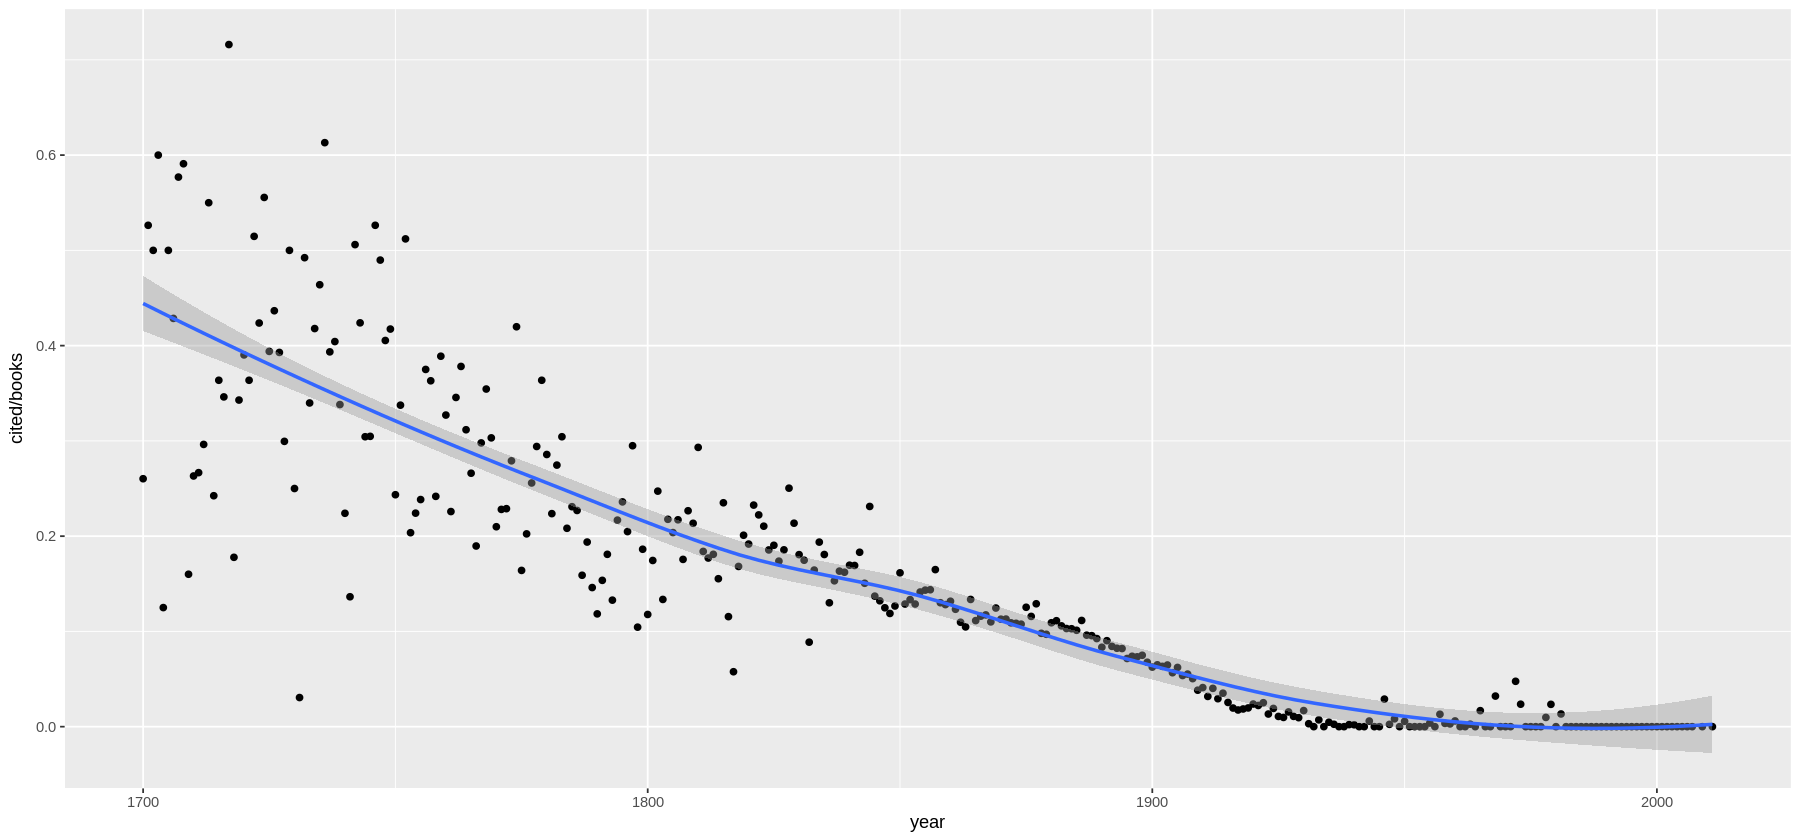

In [38]:
year.books |>
  left_join(meta.cites |> filter(hits >= 10) |> select(year, book) |> distinct() |> group_by(year) |> summarize(cited=n()), by="year") |>
  mutate(cited=if_else(is.na(cited), 0, cited)) |>
  filter(year >= 1700) |>
  ggplot(aes(year, cited/books)) + geom_point() + geom_smooth()

In [39]:
meta.cites |> filter(is.edition) |> count()
meta.cites |> filter(is.edition) |> filter(str_detect(author, fixed(work.author)) | str_detect(title, fixed(work.author))) |> count()
meta.cites |> filter(is.edition) |> filter(str_detect(title, fixed(work.title))) |> count()

  #(str_detect(author, fixed(work.author)) | str_detect(work.author, fixed(author))))

n
<int>
41530


n
<int>
21833


n
<int>
1738


In [40]:
22272/54819

[1] 0.4062825

In [41]:
meta.cites |> filter(is.edition) |>
  rowwise() |> mutate(adist=agrepl(work.author, author), tdist=agrepl(work.author, title)) |>
  ungroup() |> filter(adist | tdist) |> count()

meta.cites |> filter(is.edition) |>
  rowwise() |> mutate(dist=agrepl(work.title, title, max.distance = 0.1)) |>
  ungroup() |> filter(dist) |> count()

n
<int>
23014


n
<int>
3551


In [42]:
overlap |> filter(cover > 0.9 & wover < 0.2) |> mutate(book=tolower(book)) |> arrange(-cover)

edition,book,lcslen,lblcs,wlcs,tlen,nlocs,cover,overlap,wover
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
urn:cts:latinLit:stoa0121g.stoa004.opp-lat1,hnhban,15,16680.0,38669.0,194899,31,1,0.4838710,0.1984053
urn:cts:greekLit:tlg0086.tlg010.perseus-grc2,ah5als,115,72776.0,77189.0,406266,116,1,0.9913793,0.1899962
urn:cts:greekLit:tlg0059.tlg013.perseus-grc2,hxjfe7,33,8903.0,14681.0,78090,33,1,1.0000000,0.1880010
urn:cts:greekLit:tlg0031.tlg022.perseus-grc2,ah629c,33,1168.5,1682.0,8974,61,1,0.5409836,0.1874304
urn:cts:greekLit:tlg4102.tlg005.1st1K-grc1,ah5gz5,21,37851.0,100901.0,561285,21,1,1.0000000,0.1797679
urn:cts:latinLit:phi0631.phi002.perseus-lat4,hxq4d8,75,11103.0,26750.0,149464,114,1,0.6578947,0.1789729
urn:cts:greekLit:tlg0540.tlg009.perseus-grc2,32044085139459,17,1275.0,1275.0,7063,22,1,0.7727273,0.1805182
urn:cts:latinLit:phi0588.abo020.perseus-lat2,hxq4jc,21,1026.0,1057.5,5961,24,1,0.8750000,0.1774031
urn:cts:latinLit:stoa0040.stoa001a.opp-lat1,ah56pa,39,26574.0,29931.0,175832,39,1,1.0000000,0.1702250


Analyze books with a lot of Greek that are not editions.

In [43]:
greek.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/greek-words.csv", header=TRUE)

In [94]:
greek.book.overlap <- overlap |>
  mutate(work=str_replace(edition, "\\.[^.]+$", "")) |>
  filter(str_detect(work, "greekLit")) |>
  group_by(book) |>
  summarize(urn=work[which.max(wover)], cover=max(cover), overlap=max(overlap), wover=max(wover), wlcs=sum(wlcs)) |>
  ungroup() |>
  left_join(works |> select(urn, work.author=author, work.title=title), by="urn")

In [95]:
greek.book.overlap |> filter(wover >= 0.1)

book,urn,cover,overlap,wover,wlcs,work.author,work.title
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
32044001262195,urn:cts:greekLit:tlg0031.tlg002,0.5530973,0.5427729,0.4607313,111842.50,New Testament,Gospel of Mark
32044002418820,urn:cts:greekLit:tlg0032.tlg006,0.9897890,0.9897890,0.9523412,417583.50,Xenophon,Anabasis
32044004329728,urn:cts:greekLit:tlg0013.tlg027,0.1363636,0.1363636,0.1274864,5196.00,Homeric Hymns,Hymn 27 to Artemis
32044004330304,urn:cts:greekLit:tlg0013.tlg032,1.0000000,1.0000000,0.9623706,1530737.83,Homeric Hymns,Hymn 32 To Selene
32044004331278,urn:cts:greekLit:tlg0019.tlg009,0.9777531,0.9605117,0.9147753,63157.00,Aristophanes,Frogs
32044004333092,urn:cts:greekLit:tlg0085.tlg005,0.9921164,0.9921164,0.9484486,60953.00,Aeschylus,Agamemnon
32044004333100,urn:cts:greekLit:tlg0085.tlg005,0.9812007,0.9793814,0.9276367,61060.50,Aeschylus,Agamemnon
32044004335766,urn:cts:greekLit:tlg0059.tlg004,0.9354839,0.9354839,0.8836358,185909.50,Plato,Phaedo
32044004394003,urn:cts:greekLit:tlg0062.tlg066,0.8141593,0.8141593,0.7379408,67533.50,Lucian of Samosata,Dialogi mortuorum


In [96]:
greek.words |> filter(wc >= 10000) |> count()

n
<int>
10540


In [97]:
greek.books <- greek.words |>
  mutate(words.per.line=wc/lc) |>
  left_join(greek.book.overlap, by="book") |>
  inner_join(idi.dated, by="book") |>
  mutate(wover=if_else(is.na(wover), 0, wover), cover=if_else(is.na(cover), 0, cover), wlcs=if_else(is.na(wlcs), 0, wlcs))


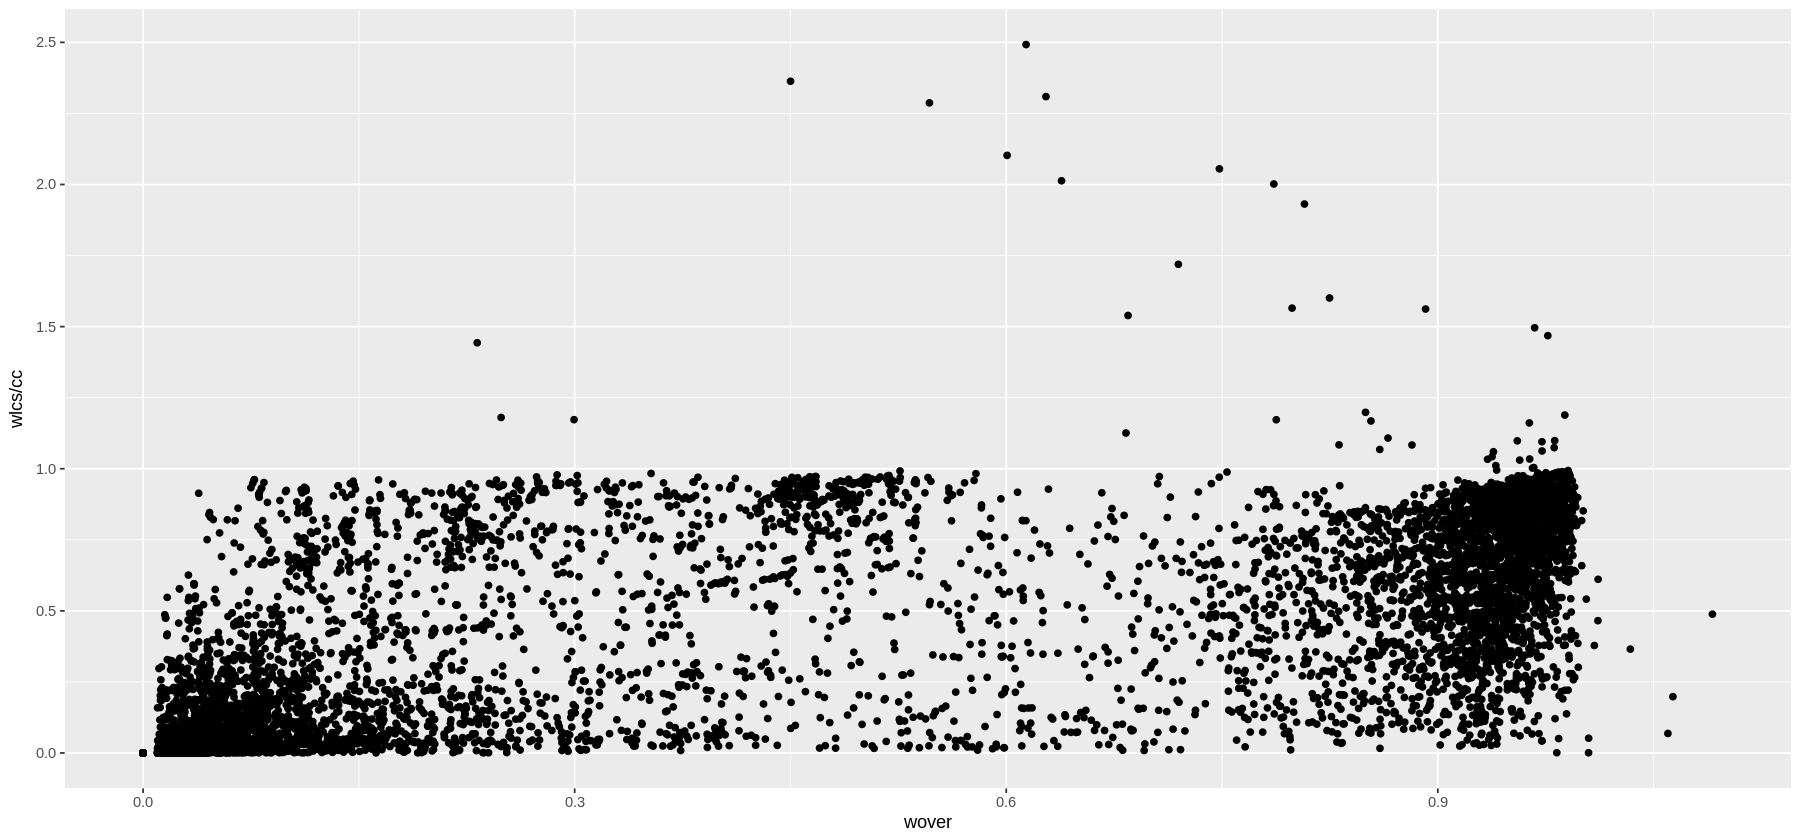

In [98]:
greek.books |> filter(wc >= 10000) |>
  ggplot(aes(wover, wlcs/cc)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


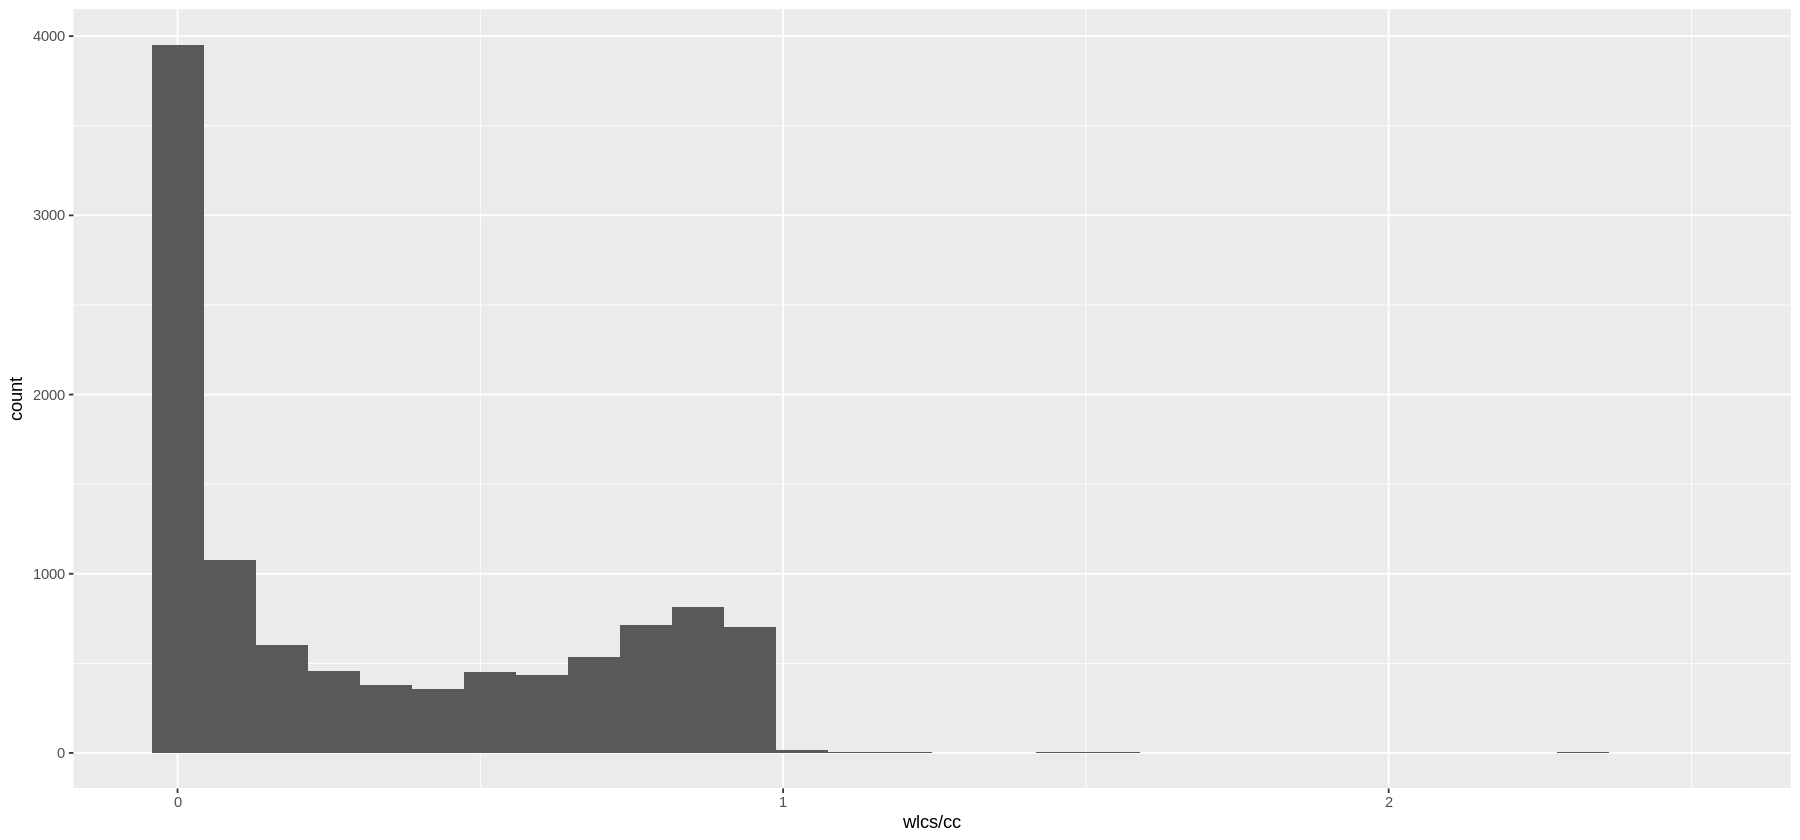

In [99]:
greek.books |> filter(wc >= 10000) |> ggplot(aes(wlcs/cc)) + geom_histogram()

In [104]:
greek.books |>
  mutate(ccover=wlcs/cc) |>
  filter(wc >= 10000 & ccover < 0.7) |>
  select(-words.per.line, -urn, -language_src, -ocr_score_gen, -year2, -overlap, -date2_src) |>
  arrange(-ccover)

book,lc,wc,cc,cover,wover,wlcs,work.author,work.title,title,author,date1_src,date_types_src,language_gen,ocr_score_src,year,ccover
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
HW2ESL,3066,13865,101304,0.9834437,0.9196052,70897.05,Euripides,The Phoenician Women,Ausgewählte Tragödien des Euripides. Für den Schulgebrauch,Euripides.,1871,Single known date/probable date,deu,89,1871,0.6998445
HW2J9T,3090,13295,98239,0.9849307,0.9445758,68710.33,Aristophanes,Clouds,Ausgewählte Komödien des Aristophanes.,Aristophanes.,1852,Multiple dates,deu,88,1852,0.6994201
HXPP77,16312,119399,844994,1.0000000,0.9866691,590986.50,Demosthenes,Apollodorus Against Callippus,Oratores attici,"Bekker, Immanuel",1823,Single known date/probable date,ell,85,1823,0.6993973
HW2J4Y,8701,71204,464641,1.0000000,0.7950431,324926.00,Aristotle,Nicomachean Ethics,Ethicorum Nicomacheorum libri decem.,Aristotle.,1716,Single known date/probable date,ell,89,1716,0.6993055
HXJ9B9,6679,43168,314048,0.9967532,0.9305391,219555.50,Iamblichus,De Vita Pythagorica,Iamblichi Chalcidensis ex Coele-Syria De vita Pythagorica liber : Graece et Latine,Iamblichus,1815,Multiple dates,lat,91,1815,0.6991145
32044085114551,2638,12525,90154,0.9790294,0.8995939,63021.05,Euripides,Iphigenia in Aulis,Iphigénie à Aulis.,Euripides.,1899,Single known date/probable date,fra,87,1899,0.6990378
HX5PYM,12693,69698,498025,0.9979438,0.9614316,348099.67,Euripides,Medea,Euripides.,Euripides.,1857,Single known date/probable date,eng,91,1857,0.6989602
32044021076880,13001,70880,499374,0.9968944,0.9577205,349041.83,Euripides,Andromache,Euripides.,Euripides.,1857,Single known date/probable date,eng,91,1857,0.6989588
HN27XT,8937,49246,341911,0.2613192,0.2043819,238957.00,Thucydides,History of the Peloponnesian War,Thukydides;,Thucydides.,1873,Multiple dates,deu,90,1873,0.6988866


In [61]:
greek.books |>
  filter(wover < 0.1 & cover < 0.3 & wc >= 10000) |>
  mutate(book=tolower(book)) |>
  arrange(-wc)


book,lc,wc,cc,words.per.line,urn,cover,overlap,wover,wlcs,⋯,author.y,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen,year,year2
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
32044059847368,151503,1038413,7656297,6.854075,urn:cts:greekLit:tlg0606.tlg001,0.28000000,0.24000000,0.02692648,9500.50,⋯,,1890,19uu,Continuing resource ceased publication (Dead status),ell,ell,88,99,1890,NA
32044037324878,107151,887927,6495224,8.286689,urn:cts:greekLit:tlg0035.tlg003,0.29629630,0.11111111,0.05419580,5365.50,⋯,,1883,1892,Continuing resource ceased publication (Dead status),ell,ell,86,99,1883,1892
32044100014992,73151,858826,5885417,11.740455,urn:cts:greekLit:tlg0013.tlg031,0.22222222,0.16666667,0.03084112,4560.00,⋯,"Kōnstantinidēs, Anestēs P.",1901,1906,Multiple dates,ell,ell,0,100,1901,1906
hn5aii,108453,746035,5329442,6.878878,NA,0.00000000,NA,0.00000000,0.00,⋯,"Liddell, Henry George",1871,,Single known date/probable date,eng,ell,10,100,1871,NA
32044100438399,121917,684519,4851938,5.614631,NA,0.00000000,NA,0.00000000,0.00,⋯,,1902,,Single known date/probable date,tur,ell,84,100,1902,NA
32044057029480,63155,646540,4971632,10.237353,urn:cts:greekLit:tlg0029.tlg005,0.11538462,0.11538462,0.01314571,650.50,⋯,Greece.,1914,1915,Multiple dates,ell,ell,87,100,1914,1915
32044098648256,90153,641514,4617743,7.115836,urn:cts:latinLit:stoa0089.stoa007,0.12500000,0.09523810,0.03996029,1306.00,⋯,,1876,1895,Continuing resource ceased publication (Dead status),ell,ell,86,100,1876,1895
hwsrmq,119929,638447,4635477,5.323541,NA,0.00000000,NA,0.00000000,0.00,⋯,,1884,,Single known date/probable date,tur,ell,83,100,1884,NA
32044098648066,96091,633237,4589763,6.589972,urn:cts:greekLit:tlg0066.tlg001,0.09615385,0.05349794,0.01338682,942.00,⋯,,1876,1895,Continuing resource ceased publication (Dead status),ell,ell,87,100,1876,1895


Top works by quotations minus editions.

In [48]:
meta.cites |> filter(!is.edition) |>
  group_by(work, work.author, work.title, words) |> summarize(hits=sum(hits)) |> ungroup() |>
  mutate(rate=hits/words) |> select(work.author, work.title, rate) |> arrange(-rate) |> head(40)

`summarise()` has grouped output by 'work', 'work.author', 'work.title'. You
can override using the `.groups` argument.


work.author,work.title,rate
<chr>,<chr>,<dbl>
Horace,Odes,42.48262
Horace,Ars Poetica,32.43722
Virgil,Eclogues,30.62086
Horace,Carmen Saeculare,28.11935
Horace,Epistulae,27.06275
Virgil,Georgics,24.46055
"Nepos, Cornelius",Aristides,23.18444
Horace,Satires,22.70149
Horace,Epodi,21.53413
